# MASTER EN DATA SCIENCE. 
## DATA MINING
### JORGE BARQUERO VILLAGRA 

---

**ACTIVIDAD 1.**

Descripción
Tomando como origen la información del fichero customer-entrenamiento.csv (colgado en el campus virtual), referente a los datos de los clientes de un comercio electrónico, se debe de seguir la metodología CRISP-DM de cara a proponer una segmentación sobre los clientes que permita una gestión personalizada de los mismos.

### Paso 1: Business Understanding

En este ejercicio, se analiza el fichero customer-entrenamiento, que contiene un conjunto de datos de clientes con las siguientes características

- Contact_ID: ID único del contacto
- Age: Edad 
- FamilySize: Tamaño de su núcleo familiar
- YearExperience: años de experiencia
- AnnualIncome: Ingreso anual
- EducationLevel_ID: ID de nivel educativo
- NETPRICE_PRO##_AMT: Costo de un total de 7 productos (7 columnas distintas)

----
### Paso 2: Data Understanding
PROCESOS INICIALES

Cargar bibliotecas y leer datos del archivo

In [11]:
# Import de librerías
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

# Read the data
data = pd.read_csv('data/customer-entrenamiento.csv')
data.set_index('CONTACT_ID', inplace=True)
# Datos de cabecera del archivo.
data.head()

,AGE,FAMILYSIZE,YEAREXPERIENCE,ANNUALINCOME,EDUCATIONLEVEL_ID,NETPRICE_PRO11_AMT,NETPRICE_PRO12_AMT,NETPRICE_PRO13_AMT,NETPRICE_PRO14_AMT,NETPRICE_PRO15_AMT,NETPRICE_PRO16_AMT,NETPRICE_PRO17_AMT
CONTACT_ID,,,,,,,,,,,,
395,28,4,4,49,1,0.0,1.0,0.0,16.0,0.0,0.0,0.0
396,48,3,22,34,1,0.0,1.0,0.0,15.0,0.0,0.0,0.0
397,42,1,18,11,1,0.0,0.0,0.0,10.0,0.0,0.0,0.0
398,38,1,12,100,2,0.0,0.0,0.0,27.0,0.0,0.0,0.0
399,38,4,11,45,2,0.0,0.0,0.0,10.0,1.0,0.0,0.0


Descripción de columnas 

In [12]:
# Descripción de datos del DS
data.describe()


,AGE,FAMILYSIZE,YEAREXPERIENCE,ANNUALINCOME,EDUCATIONLEVEL_ID,NETPRICE_PRO11_AMT,NETPRICE_PRO12_AMT,NETPRICE_PRO13_AMT,NETPRICE_PRO14_AMT,NETPRICE_PRO15_AMT,NETPRICE_PRO16_AMT,NETPRICE_PRO17_AMT
count,4482.000000,4482.000000,4482.000000,4482.000000,4482.000000,4482.000000,4482.000000,4482.000000,4482.000000,4482.000000,4482.000000,4482.000000
mean,48.293619,2.396698,23.073405,74.043730,1.876841,56.745203,0.103748,0.060687,19.487506,0.296296,0.598394,0.096162
std,11.502050,1.148111,11.480234,46.378053,0.840561,102.205787,0.304968,0.238782,17.524584,0.456674,0.490278,0.294847
min,26.000000,1.000000,3.000000,8.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,38.000000,1.000000,13.000000,39.000000,1.000000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,0.000000
50%,48.000000,2.000000,23.000000,64.000000,2.000000,0.000000,0.000000,0.000000,15.000000,0.000000,1.000000,0.000000
75%,58.000000,3.000000,33.000000,99.000000,3.000000,102.000000,0.000000,0.000000,26.000000,1.000000,1.000000,0.000000
max,70.000000,4.000000,46.000000,224.000000,3.000000,617.000000,1.000000,1.000000,100.000000,1.000000,1.000000,1.000000


In [13]:
#ClientData
clientData = data.iloc[:, :6]
#clientData.reset_index(drop=True, inplace=True)


clientData.head()

,AGE,FAMILYSIZE,YEAREXPERIENCE,ANNUALINCOME,EDUCATIONLEVEL_ID,NETPRICE_PRO11_AMT
CONTACT_ID,,,,,,
395,28,4,4,49,1,0.0
396,48,3,22,34,1,0.0
397,42,1,18,11,1,0.0
398,38,1,12,100,2,0.0
399,38,4,11,45,2,0.0


In [21]:
# Columnas de productos
productData = data.drop(clientData.columns, axis=1)
productData.head()

productData.describe()

,NETPRICE_PRO12_AMT,NETPRICE_PRO13_AMT,NETPRICE_PRO14_AMT,NETPRICE_PRO15_AMT,NETPRICE_PRO16_AMT,NETPRICE_PRO17_AMT
count,4482.000000,4482.000000,4482.000000,4482.000000,4482.000000,4482.000000
mean,0.103748,0.060687,19.487506,0.296296,0.598394,0.096162
std,0.304968,0.238782,17.524584,0.456674,0.490278,0.294847
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,7.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,15.000000,0.000000,1.000000,0.000000
75%,0.000000,0.000000,26.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,100.000000,1.000000,1.000000,1.000000


### Paso 3: Preparación de los datos

Se verifica en esta etapa si existen valores nulos, datos faltantes u otras anomalias.

In [15]:
# No existen valores nulos 
data.isnull().sum()
clientData.isnull().sum()
productData.isnull().sum()


NETPRICE_PRO12_AMT    0
NETPRICE_PRO13_AMT    0
NETPRICE_PRO14_AMT    0
NETPRICE_PRO15_AMT    0
NETPRICE_PRO16_AMT    0
NETPRICE_PRO17_AMT    0
dtype: int64

Se normalizan los datos para poder aplicar el clustering de manera correcta

In [16]:
x = data
scaler = MinMaxScaler()

# Normalizar los valores en el conjunto de datos x
x_normalizado = scaler.fit_transform(x)

# Convertir los valores normalizados de nuevo a un dataframe
x_normalizado = pd.DataFrame(x_normalizado, columns=x.columns)

# Mostrar el conjunto de datos normalizado
x_normalizado.head()
#scaler = MinMaxScaler()


,AGE,FAMILYSIZE,YEAREXPERIENCE,ANNUALINCOME,EDUCATIONLEVEL_ID,NETPRICE_PRO11_AMT,NETPRICE_PRO12_AMT,NETPRICE_PRO13_AMT,NETPRICE_PRO14_AMT,NETPRICE_PRO15_AMT,NETPRICE_PRO16_AMT,NETPRICE_PRO17_AMT
0,0.045455,1.000000,0.023256,0.189815,0.0,0.0,1.0,0.0,0.16,0.0,0.0,0.0
1,0.500000,0.666667,0.441860,0.120370,0.0,0.0,1.0,0.0,0.15,0.0,0.0,0.0
2,0.363636,0.000000,0.348837,0.013889,0.0,0.0,0.0,0.0,0.10,0.0,0.0,0.0
3,0.272727,0.000000,0.209302,0.425926,0.5,0.0,0.0,0.0,0.27,0.0,0.0,0.0
4,0.272727,1.000000,0.186047,0.171296,0.5,0.0,0.0,0.0,0.10,1.0,0.0,0.0


### Paso 4 MODELADO
 

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


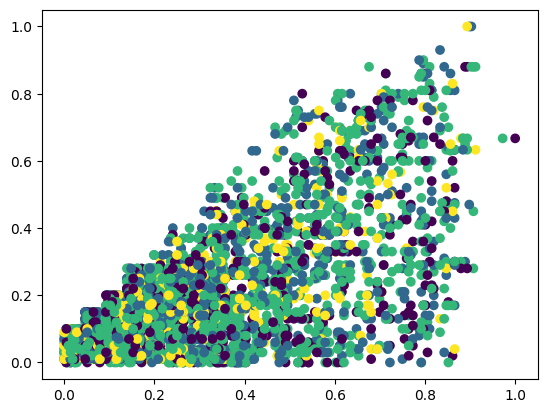

In [22]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(x_normalizado)

labels = kmeans.labels_

plt.scatter(x_normalizado['ANNUALINCOME'], x_normalizado['NETPRICE_PRO14_AMT'], c=labels)

plt.show()